# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    #print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | yuzhno-kurilsk
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | victorica
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | mahdia
Processing Record 8 of Set 1 | qapqal
City not found. Skipping...
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | bayanhongor
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | jiupu
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | stornoway
Processing Record 19 of Set 1 | kyshtovka
Processing Record 20 of Set 1 | bathsheba
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_weather_data_df = pd.DataFrame(city_data)
# Show Record Count
city_weather_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,5.26,87,99,1.72,CL,1683772856
1,albany,42.6001,-73.9662,14.38,57,0,0.89,US,1683772857
2,yuzhno-kurilsk,44.0306,145.8556,4.28,84,83,7.96,RU,1683772857
3,afaahiti,-17.7500,-149.2833,26.93,84,100,14.29,PF,1683772857
4,victorica,-36.2151,-65.4359,13.47,41,100,4.95,AR,1683772857


In [6]:
# Export the City_Data into a csv
city_weather_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_weather_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,5.26,87,99,1.72,CL,1683772856
1,albany,42.6001,-73.9662,14.38,57,0,0.89,US,1683772857
2,yuzhno-kurilsk,44.0306,145.8556,4.28,84,83,7.96,RU,1683772857
3,afaahiti,-17.7500,-149.2833,26.93,84,100,14.29,PF,1683772857
4,victorica,-36.2151,-65.4359,13.47,41,100,4.95,AR,1683772857


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

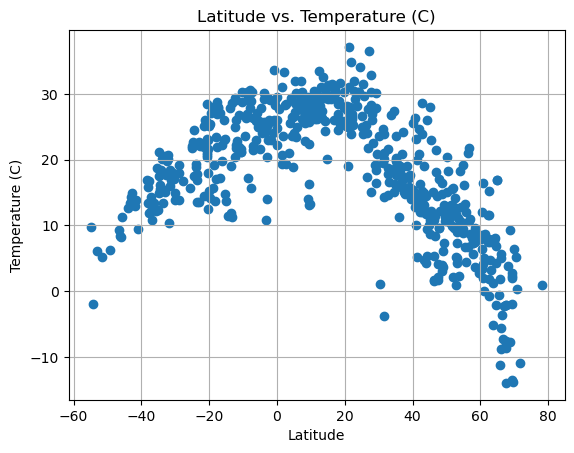

In [8]:
# Build scatter plot for latitude vs. temperature
# we are gonna use city_weather_data_df


plt.scatter(city_weather_data_df["Lat"], city_weather_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (C)")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

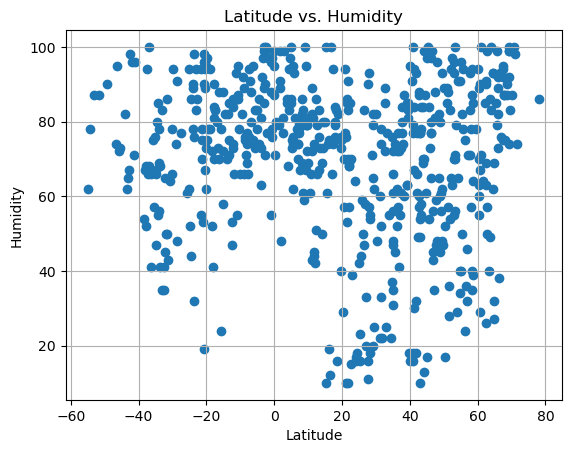

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(city_weather_data_df["Lat"], city_weather_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

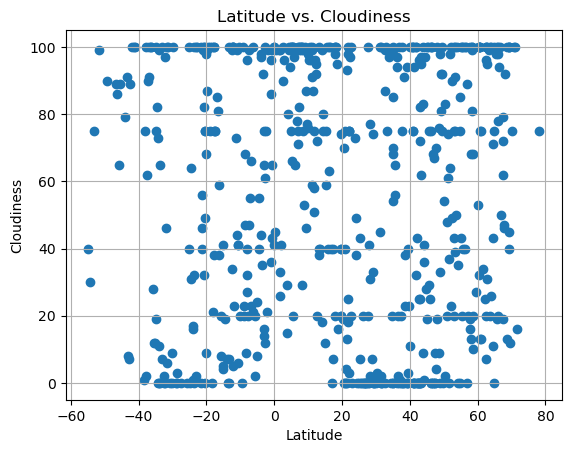

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_weather_data_df["Lat"], city_weather_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

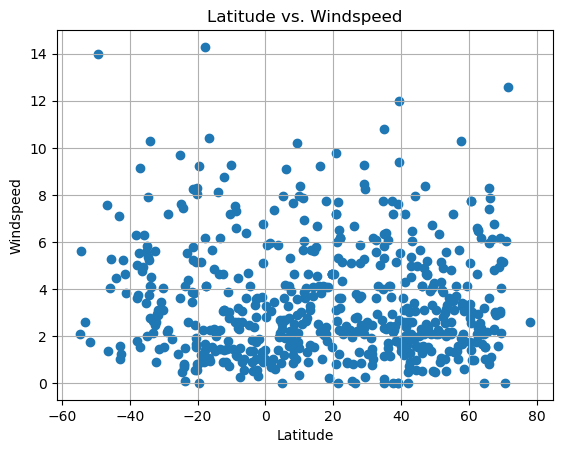

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_weather_data_df["Lat"], city_weather_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Windspeed")
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
    regression_values = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#build a function 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values, "r-")
    plt.annotate(line_equation,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"the value of r is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_weather_data_df.loc[(city_weather_data_df["Lat"] >=0)]

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,14.38,57,0,0.89,US,1683772857
2,yuzhno-kurilsk,44.0306,145.8556,4.28,84,83,7.96,RU,1683772857
6,mahdia,35.5047,11.0622,18.97,74,65,2.30,TN,1683772858
7,bethel,41.3712,-73.4140,14.17,67,0,1.54,US,1683772858
9,bayanhongor,46.7167,100.1167,8.34,43,68,4.87,MN,1683772859


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_weather_data_df.loc[(city_weather_data_df["Lat"] <0)]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,5.26,87,99,1.72,CL,1683772856
3,afaahiti,-17.7500,-149.2833,26.93,84,100,14.29,PF,1683772857
4,victorica,-36.2151,-65.4359,13.47,41,100,4.95,AR,1683772857
5,adamstown,-25.0660,-130.1015,21.72,62,100,9.70,PN,1683772858
8,grytviken,-54.2811,-36.5092,-1.94,78,30,5.60,GS,1683772859


###  Temperature vs. Latitude Linear Regression Plot

the value of r is: 0.6944322358762568


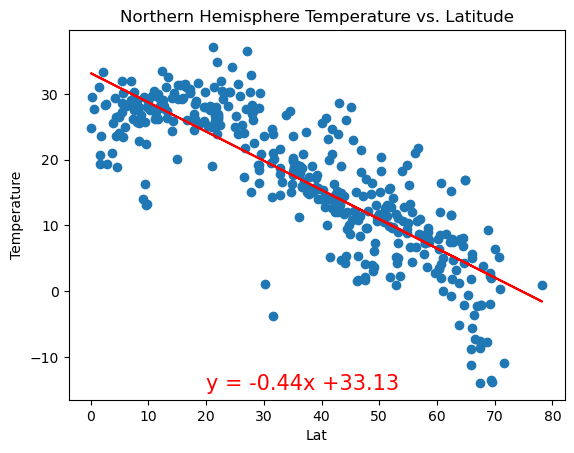

In [15]:
# Linear regression on Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]

plt.title("Northern Hemisphere Temperature vs. Latitude")
plot_regression(x_values, y_values, "Temperature", (20,-15))

the value of r is: 0.553082639015194


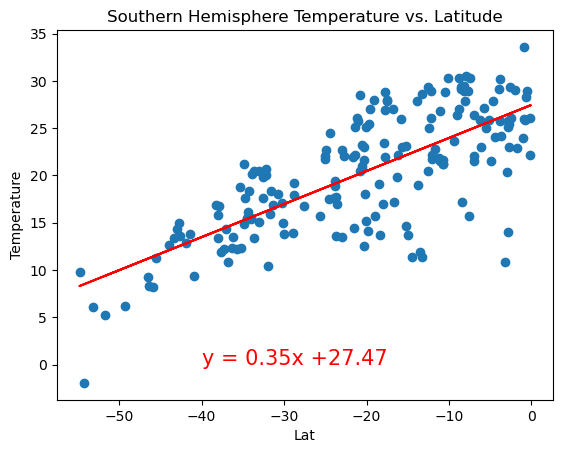

In [16]:
# Linear regression on Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]

plt.title("Southern Hemisphere Temperature vs. Latitude")
plot_regression(x_values, y_values, "Temperature", (-40,-0))

**Discussion about the linear relationship:** So I noticed a negative correlation in North Hemisphere compared to South Hemisphere positive correlation in the graphs.Looking at their r value North Hemisphere is stronger and which makes sense as the in the graph the dots are more compact comapred to South.


### Humidity vs. Latitude Linear Regression Plot

the value of r is: 0.0011689506194347574


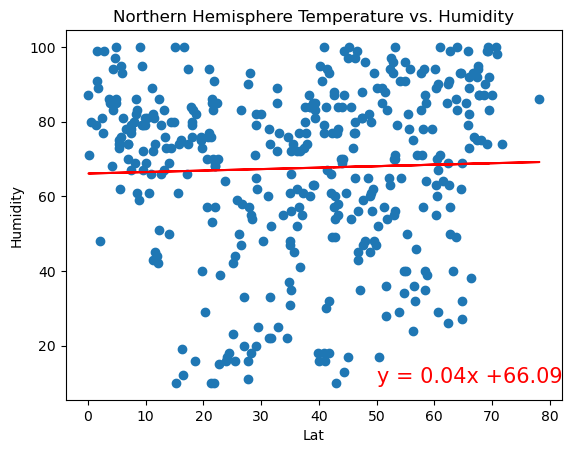

In [17]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

plt.title("Northern Hemisphere Temperature vs. Humidity")
plot_regression(x_values, y_values, "Humidity", (50,10))

the value of r is: 0.06395940618503056


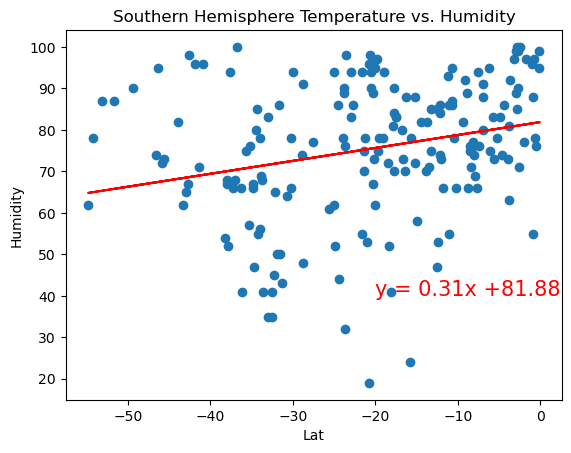

In [18]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]

plt.title("Southern Hemisphere Temperature vs. Humidity")
plot_regression(x_values, y_values, "Humidity", (-20,40))

**Discussion about the linear relationship:** No strong or no correlations can be seen in these humidity scatter plots as compared to previous scatter plots.R values are also really bad unfortunatly.

### Cloudiness vs. Latitude Linear Regression Plot

the value of r is: 0.004471049954053015


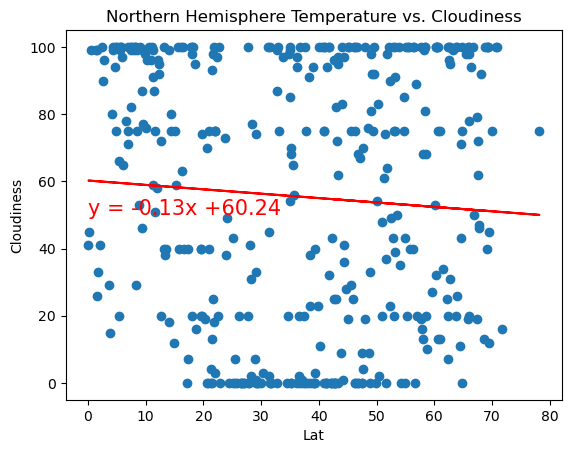

In [19]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]

plt.title("Northern Hemisphere Temperature vs. Cloudiness")
plot_regression(x_values, y_values, "Cloudiness", (0,50))

the value of r is: 0.0008818362476868281


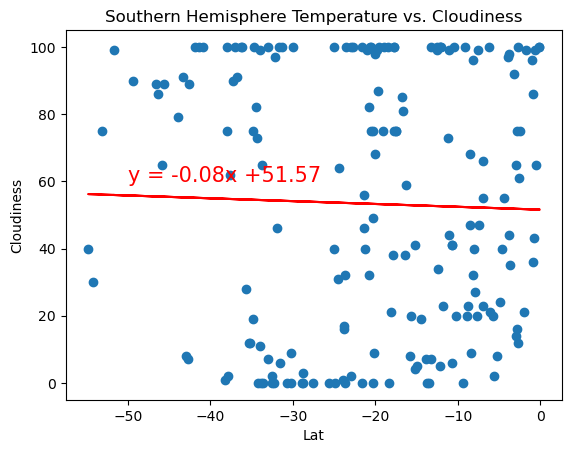

In [20]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]

plt.title("Southern Hemisphere Temperature vs. Cloudiness")
plot_regression(x_values, y_values, "Cloudiness", (-50,60))

**Discussion about the linear relationship:** Wow the data is just everywhere, No correlation can be seen between cloudiness and temperate in both scatter plots and the r values just confirm that as well.


### Wind Speed vs. Latitude Linear Regression Plot

the value of r is: 0.0005683812162340743


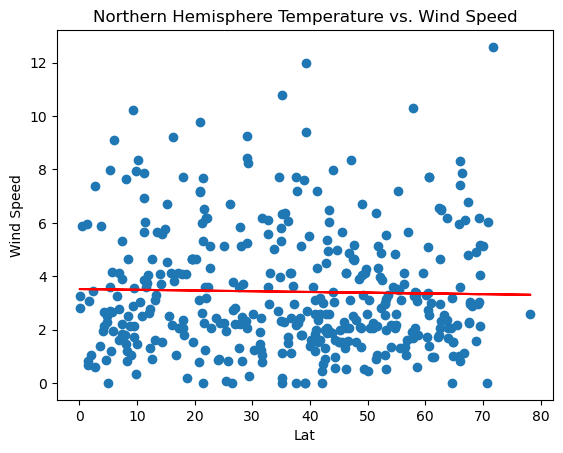

In [21]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]

plt.title("Northern Hemisphere Temperature vs. Wind Speed")
plot_regression(x_values, y_values, "Wind Speed", (10,15))

the value of r is: 0.05100574312594047


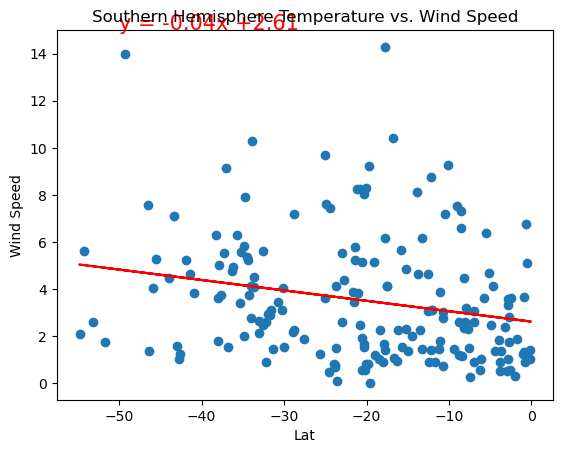

In [22]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]

plt.title("Southern Hemisphere Temperature vs. Wind Speed")
plot_regression(x_values, y_values, "Wind Speed", (-50,15))

**Discussion about the linear relationship:** Well Northern hemisphere is just doing a little bit better than Southern hemisphere but unfortunatly these two are showing no correlation in the scatter plot.